# Imports

In [1]:
import numpy as np
import pandas_datareader.data as web
import yfinance as yf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import mplfinance as mpf

# Function that Saves Stock Data to CSV

In [2]:
def save_to_csv_from_yahoo(ticker, syear, smonth, sday, eyear, emonth, eday):
    
    start = dt.datetime(syear, smonth, sday)
    end = dt.datetime(eyear, emonth, eday)

    yf.pdr_override()

    df = web.DataReader(ticker, start, end)

    df.to_csv("./files/" + ticker + ".csv")
    
    return df

# Function that Returns a Dataframe from a CSV

In [3]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv("./files/" + ticker + ".csv")
    except FileNotFoundError:
        print("File does not exist!")
    else:
        return df

# Add Daily Return to Dataframe

In [4]:
# We calculate a percentage rate of return for each day to compare investments.
# Simple Rate of Return = (End Price - Beginning Price) / Beginning Price Or (EP / BP) - 1
def add_daily_return_to_df(df, ticker):
    df['daily_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    df.to_csv("./files/" + ticker + ".csv")
    return df

# Returns Total Return over Time

In [7]:
def get_return_defined_time(df, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    df['Date'] = pd.to_datetime(df['Date'])
    
    mask = (df['Date'] >= start) & (df['Date'] <= end)
    
    daily_ret = df.loc[mask]['daily_return'].mean()
    
    df2 = df.loc[mask]
    days = df2.shape[0]

    return (days * daily_ret)

# Matplotlib Finance

In [12]:
def mplfinance_plot(ticker, chart_type, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    try:
        df = pd.read_csv("./files/" + ticker + ".csv")
    except FileNotFoundError:
        print("File does not exist!")
    else:
        df.index = pd.DatetimeIndex(df["Date"])
        df_sub = df.loc[start:end]
        mpf.plot(df_sub, type="candle")
        mpf.plot(df_sub, type="line")
        mpf.plot(df_sub, type="ohlc", mav=4)
        
        s = mpf.make_mpf_style(base_mpf_style="charles", rc={"font.size": 8})
        fig = mpf.figure(figsize=(12,8), style=s)
        ax = fig.add_subplot(2,1,2)
        av = fig.add_subplot(2,1,2, sharex=ax)
        
        mpf.plot(df_sub,type=chart_type, mav=(3,5,7), ax=ax, volume=av, show_nontrading=True)

# Simpole Price Plot

# Test Functions

[*********************100%%**********************]  1 of 1 completed


Total Return: 0.6166402116980415


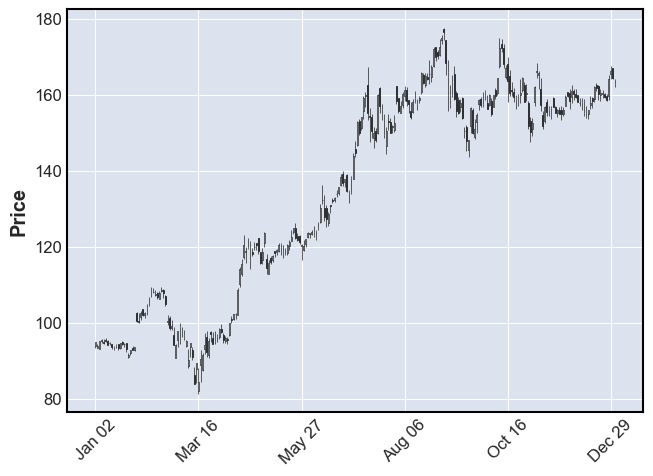

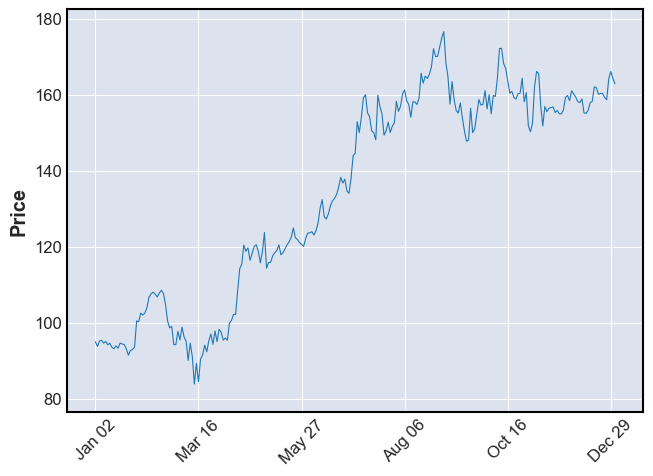

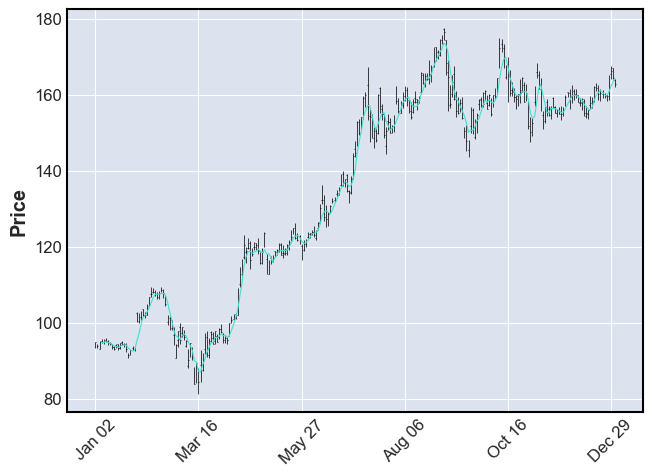

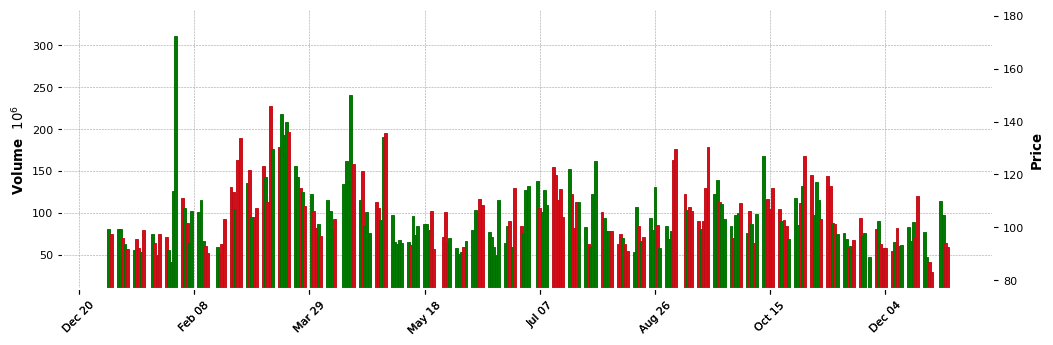

In [13]:
save_to_csv_from_yahoo("AMZN", 2020, 1, 1, 2021, 1, 1)

AMZN = get_df_from_csv("AMZN")

add_daily_return_to_df(AMZN, "AMZN")

AMZN

total_ret = get_return_defined_time(AMZN, 2020, 1, 1, 2021, 1, 1)
print("Total Return:", total_ret)

mplfinance_plot("AMZN", "ohlc", 2020, 1, 1, 2021, 1, 1)